# 1. Find the probability for the case of l > t.

$ l > t = $$  {\displaystyle \int_{\theta = 0}^{(\pi/2)} } $ $  {\displaystyle \int_{x = 0}^{m(\theta)} } $ $\frac{4}{t\pi }$ $dx d\theta $

$ l > t   = $ $\frac{2}{\pi }$ $cos^-1 $ $\frac{t}{l}$  + $\frac{2}{\pi}$$\frac{l}{t}$ {  $\sqrt(1 - (\frac{t}{l})^2$ }

In [453]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
class Buffon_Short_Needle:
    def __init__(self,l,t):
        self.l = l #needle length
        self.t = t #width of the strip on the board
        
    def throw_needle(self):
            centerofneedle = np.random.uniform(0,self.t/2)
            theta = np.random.uniform(0, np.pi/2)
            
            if centerofneedle < (self.l/2)* np.sin(theta):
                    return 1 # win
            else:
                    return 0 #you lost
                
    def __str__(self):
        return "Buffon_Needle"


## Testing Buffon's Game

In [121]:
game1 = Buffon_short_needle(2,4)
print(game1.throw_needle())
print(game1.throw_needle())
print(game1.throw_needle())
print(game1.throw_needle())

0
0
0
1


## Let's Play!!

In [347]:
def play_game(game, number_of_throws):
    total_wins = 0
    for i in range(number_of_throws):
        total_wins += game.throw_needle()
    ratio=total_wins/number_of_throws
#     print(total_wins, "wins out of", number_of_throws , 'in the', game)
#     print("Expected return for ", game, "is ", str(100*ratio)+"% \n")
    return (ratio)

In [119]:
play_game(game1,20)

5 wins out of 20 in the Buffon_needle
Expected return for  Buffon_needle is  25.0% 



0.25

# 2. Find the probability using Monte Carlo simulation for l < t

In [177]:
our_game = Buffon_needle(2,4)
list_of_throws = [10, 100, 1000, 10000, 100000, 1000000]

for spins_num in list_of_throws:
    for _ in range(2):
        play_game(our_game, spins_num)

3 wins out of 10 in the Buffon_needle
Expected return for  Buffon_needle is  30.0% 

2 wins out of 10 in the Buffon_needle
Expected return for  Buffon_needle is  20.0% 

35 wins out of 100 in the Buffon_needle
Expected return for  Buffon_needle is  35.0% 

34 wins out of 100 in the Buffon_needle
Expected return for  Buffon_needle is  34.0% 

306 wins out of 1000 in the Buffon_needle
Expected return for  Buffon_needle is  30.599999999999998% 

310 wins out of 1000 in the Buffon_needle
Expected return for  Buffon_needle is  31.0% 

3218 wins out of 10000 in the Buffon_needle
Expected return for  Buffon_needle is  32.18% 

3190 wins out of 10000 in the Buffon_needle
Expected return for  Buffon_needle is  31.900000000000002% 

31794 wins out of 100000 in the Buffon_needle
Expected return for  Buffon_needle is  31.794% 

32006 wins out of 100000 in the Buffon_needle
Expected return for  Buffon_needle is  32.006% 

317891 wins out of 1000000 in the Buffon_needle
Expected return for  Buffon_n

# For the general case and find the value of the π using some special case (e.g. l = 2, and t = 3)


In [180]:
game_pi = Buffon_Short_Needle(2,3)
million_games = play_game(game_pi,1000000)
def find_pi(Ratio,game):
    return((2*game.l)/(game.t*Ratio))

print('My Pi is',find_pi(million_games,game_pi))
print('True Pi is ', np.pi)

424521 wins out of 1000000 in the Buffon_Needle
Expected return for  Buffon_Needle is  42.4521% 

My Pi is 3.1407947624106543
True Pi is  3.141592653589793


# 3. Find the probability using Monte Carlo simulation (l > t) for the general case.

In [149]:
class Buffon_long_needle(Buffon_Short_Needle):        
    def throw_needle(self):
            theta = np.random.uniform(0, np.pi/2)
            centerofneedle = np.random.uniform(0,min(((self.l/2)*np.cos(theta)),(self.t/2)))
            
            if centerofneedle < (self.l/2)* np.sin(theta):
                    return 1 # win
            else:
                    return 0 #you lost   
                
    def __str__(self):
        return "Buffon_long_needle"

In [173]:
game_long = Buffon_long_needle(8,2)

In [174]:
list_of_throws = [10, 100, 1000, 10000, 100000, 1000000]

for spins_num in list_of_throws:
    for _ in range(2):
        play_game(game_long, spins_num)        

9 wins out of 10 in the Buffon_long_needle
Expected return for  Buffon_long_needle is  90.0% 

10 wins out of 10 in the Buffon_long_needle
Expected return for  Buffon_long_needle is  100.0% 

87 wins out of 100 in the Buffon_long_needle
Expected return for  Buffon_long_needle is  87.0% 

93 wins out of 100 in the Buffon_long_needle
Expected return for  Buffon_long_needle is  93.0% 

931 wins out of 1000 in the Buffon_long_needle
Expected return for  Buffon_long_needle is  93.10000000000001% 

931 wins out of 1000 in the Buffon_long_needle
Expected return for  Buffon_long_needle is  93.10000000000001% 

9190 wins out of 10000 in the Buffon_long_needle
Expected return for  Buffon_long_needle is  91.9% 

9219 wins out of 10000 in the Buffon_long_needle
Expected return for  Buffon_long_needle is  92.19000000000001% 

91993 wins out of 100000 in the Buffon_long_needle
Expected return for  Buffon_long_needle is  91.99300000000001% 

91998 wins out of 100000 in the Buffon_long_needle
Expected

In [657]:
#Checking Work
def prob_calc(l,t):
    if l < t:
        return((2*l))/((t*np.pi))
    else:
        return( ((2/np.pi)*math.acos((t/l)))  + ((2/np.pi)*(l/t)*(1 - np.sqrt(1-(t/l)**2))))
prob_calc(84,89) 

0.6008546166165936

# Plot

In [483]:
def rand_num():
    l = random.randint(1,100)
    t = random.randint(10,100)
    return( l, t)
rand_num()
tuple_list = tuple([tuple(rand_num()) for i in range(300)])

## Monte Carlo Simulation

In [678]:
dict_x  = {}
for l, t in tuple_list:
    if l < t:
        game_pi = Buffon_Short_Needle(l,t)
        million_games = play_game(game_pi,10000)
        dict_x[l,t] = million_games
    else:
        game_pi = Buffon_long_needle(l,t)
        million_games = play_game(game_pi,10000)
        dict_x[l,t] = million_games
df = pd.DataFrame(dict_x.items(), columns=['Key', 'Probability'])
df['X'] = [(l/t) for l,t in df['Key']]

## Analytic approach:

In [ ]:
dict_calc  = {}
for l, t in tuple_list:
    dict_calc[l,t] = prob_calc(l,t)
df2 = pd.DataFrame(dict_calc.items(), columns=['Key', 'Probability'])
df2['X'] = [(l/t) for l,t in df['Key']]

# 4. After writing your general code in Part 3 plot the Probability vs l/t ratio.


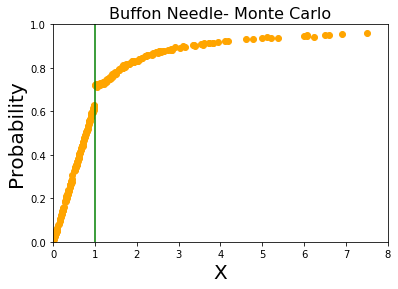

In [695]:
plt.scatter(df['X'],df['Probability'],color='orange')
plt.axvline(1, color = 'green')
plt.xlim(0, 8,0.01)
plt.ylim(0, 1,0.01)
plt.title('Buffon Needle- Monte Carlo', size = 16)
plt.xlabel(r"X", size=20)
plt.ylabel(r"Probability", size=20)
plt.show()

# 5. Plot the analytic formula for P(l/t) along side your previous result and comment on the result.

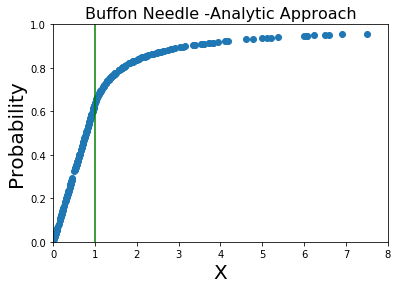

In [692]:
plt.title('Buffon Needle -Analytic Approach', size = 16)
plt.xlabel(r"X", size=20)
plt.ylabel(r"Probability", size=20)
plt.xlim(0, 8,0.01)
plt.ylim(0, 1,0.01)
plt.scatter(df2['X'],df2['Probability'],)
plt.axvline(1, color = 'green')
plt.show()

In the Analytic approach, the results create a smoother line than the Monte Carlo simulation. This is expected. We can also see when the needle is shorter, the probablity changes linearly.